## Project Aim and summary of the Project

The aim of the project was to develop a machine learning model that can accurately forecast the number of units of each type of product that will be sold in a Walmart store located in Texas over the next 28 days. The utilized data comes from Walmart’s M5 Forecasting Accuracy competition and includes details about specific items and product categories, as well as variables such as price, promotions, and special events. The dataset consists of 823 diverse food products. 

For this project, I focused on data preprocessing and exploratory data analysis (EDA), while the rest of the team focused on the modeling part. Specifically, I merged and prepared the data for training and visualization.

The EDA was divided into two parts: EDA on predictor variables and EDA on time series. I conducted the EDA on predictor variables in this notebook, while the EDA on time series was done in another notebook using R. To easily understand this notebook, I suggest reading section 2 of the paper, which covers the predictor variables EDA. If you're also interested in the time series EDA, then please read section 3 as well.

In [1]:
import numpy as np
import pandas as pd

!!! The data comes in various files so I merged the necessary datasets. The important dataframes to keep track of are "df" that my team used for training and "merged" that I will use for the EDA. You can skip the following cells until you get to the EDA markdown. You can also visualize the "merged" dataframe just one cell above the EDA markdown

In [208]:
train_dev = pd.read_csv("sales_train_validation_afcs2022.csv")
test_dev = pd.read_csv("sales_test_validation_afcs2022.csv")
calendar = pd.read_csv("calendar_afcs2022.csv")
prices = pd.read_csv("sell_prices_afcs2022.csv")

In [900]:
test_dev

,id,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,FOODS_3_001_TX_3_validation,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,2,0,0,2,1,0,3,1,1,1
2,FOODS_3_003_TX_3_validation,0,0,1,0,0,0,0,0,1,...,2,0,2,1,0,2,0,0,2,1
3,FOODS_3_004_TX_3_validation,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,FOODS_3_005_TX_3_validation,1,1,2,0,2,0,2,1,4,...,1,0,1,1,1,2,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,FOODS_3_823_TX_3_validation,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,1,0,1
819,FOODS_3_824_TX_3_validation,0,0,0,0,0,0,0,2,0,...,0,0,2,1,0,1,0,2,0,0
820,FOODS_3_825_TX_3_validation,2,0,0,2,2,0,3,1,1,...,3,1,1,2,0,2,5,0,0,3
821,FOODS_3_826_TX_3_validation,1,0,1,5,1,0,1,1,3,...,2,2,2,0,0,2,4,0,6,2


In [701]:
#restructuring the data (this is the format we will need for training)

train_dev = pd.read_csv("sales_train_validation_afcs2022.csv")
#c = calendar.transpose()["date"]
calendar = pd.read_csv("calendar_afcs2022.csv")

c = calendar.loc[:,"date"]

#c = pd.concat([pd.Series([0]), c])
df = train_dev.reset_index().iloc[:,2:].transpose().reset_index().join(c).transpose()

df = df.iloc[1:,:].join(train_dev["id"])

df.iloc[-1,-1] = "id"

df.columns=df.iloc[-1]

df = df.iloc[:-1,:]

df.rename(columns = {'date':'index'}, inplace = True)

df_nomelt = df

df =df.melt(id_vars=['id'],  var_name="date")

# Convert the "date" column to a datetime series
df['date'] = pd.to_datetime(df['date'])

# Format the datetime series in the desired format
df['date'] = df['date'].dt.strftime('%m-%d-%Y')
df

,id,date,value
0,FOODS_3_001_TX_3_validation,01-29-2011,0
1,FOODS_3_002_TX_3_validation,01-29-2011,0
2,FOODS_3_003_TX_3_validation,01-29-2011,0
3,FOODS_3_004_TX_3_validation,01-29-2011,0
4,FOODS_3_005_TX_3_validation,01-29-2011,0
...,...,...,...
1574394,FOODS_3_823_TX_3_validation,04-24-2016,2
1574395,FOODS_3_824_TX_3_validation,04-24-2016,0
1574396,FOODS_3_825_TX_3_validation,04-24-2016,0
1574397,FOODS_3_826_TX_3_validation,04-24-2016,2


the df dataframe will be used for training

In [702]:
#df_nomelt = df_nomelt.drop(columns="id")
#df_nomelt.columns = pd.to_datetime(df_nomelt.columns)
df_nomelt = df_nomelt.set_index("id")
df_nomelt.columns = pd.to_datetime(df_nomelt.columns)
df_nomelt

date,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
id,,,,,,,,,,,,,,,,,,,,,
FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,1,...,0,0,0,0,2,0,0,5,2,0
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,1,...,0,4,2,1,1,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
FOODS_3_824_TX_3_validation,0,1,0,1,0,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_825_TX_3_validation,0,0,0,2,1,1,0,0,1,1,...,1,1,1,3,1,0,0,4,2,0


### Merge calendar and train_dev (now called df_nomelt)

In [704]:
calendar = pd.read_csv("calendar_afcs2022.csv")

# Convert the "date" column to a datetime series
calendar['date'] = pd.to_datetime(calendar['date'])

# Format the datetime series in the desired format
calendar['date'] = calendar['date'].dt.strftime('%m-%d-%Y')
calendar = calendar[:-56]
calendar

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
0,01-29-2011,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
1,01-30-2011,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0
2,01-31-2011,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0
3,02-01-2011,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1
4,02-02-2011,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1908,04-20-2016,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0
1909,04-21-2016,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0
1910,04-22-2016,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0
1911,04-23-2016,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0


In [705]:
df_nomelt_tomerge = df_nomelt.transpose().reset_index()
#df_nomelt_tomerge['date'] = pd.to_datetime(df_nomelt_tomerge['date'])

# Format the datetime series in the desired format
df_nomelt_tomerge['date'] = df_nomelt_tomerge['date'].dt.strftime('%m-%d-%Y')
df_nomelt_tomerge

id,date,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,...,FOODS_3_818_TX_3_validation,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation
0,01-29-2011,0,0,0,0,0,0,27,0,0,...,0,9,3,0,7,0,0,0,0,0
1,01-30-2011,2,0,0,0,1,0,27,0,0,...,0,0,2,0,5,0,1,0,0,0
2,01-31-2011,1,0,0,0,1,0,8,0,0,...,0,3,1,0,5,0,0,0,0,0
3,02-01-2011,3,0,0,0,0,0,0,0,0,...,0,0,3,0,3,0,1,2,0,0
4,02-02-2011,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,04-20-2016,0,0,0,0,0,0,0,0,1,...,3,0,1,0,0,0,0,0,3,0
1909,04-21-2016,0,0,0,0,1,1,0,0,0,...,0,1,2,2,1,0,0,0,1,1
1910,04-22-2016,5,0,1,0,0,1,0,0,0,...,1,0,3,2,0,2,0,4,2,0
1911,04-23-2016,2,0,0,0,4,1,0,0,0,...,1,3,1,0,1,0,0,2,1,0


In [601]:
merged = pd.merge(df_nomelt_tomerge, calendar, on="date")
merged["daily_sales"] = merged.loc[:,'FOODS_3_001_TX_3_validation':'FOODS_3_827_TX_3_validation'].sum(axis=1)
merged

,date,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,...,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,daily_sales
0,01-29-2011,0,0,0,0,0,0,27,0,0,...,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,1686.0
1,01-30-2011,2,0,0,0,1,0,27,0,0,...,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,1661.0
2,01-31-2011,1,0,0,0,1,0,8,0,0,...,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,1189.0
3,02-01-2011,3,0,0,0,0,0,0,0,0,...,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1137.0
4,02-02-2011,0,0,0,0,0,0,0,0,0,...,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,0,954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,04-20-2016,0,0,0,0,0,0,0,0,1,...,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,1526.0
1909,04-21-2016,0,0,0,0,1,1,0,0,0,...,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,1423.0
1910,04-22-2016,5,0,1,0,0,1,0,0,0,...,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,1664.0
1911,04-23-2016,2,0,0,0,4,1,0,0,0,...,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,1974.0


# EDA on predictor variables

## Investigating events

how many different events are there?

In [602]:
print(len(merged["event_name_1"].unique())-1) #minus one coz taking away nan
merged["event_name_1"].unique()

30


array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [603]:
print(len(merged["event_name_2"].unique())-1) #minus one coz taking away nan
merged["event_name_2"].unique()

4


array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

how many double events in a day?

In [604]:
merged.loc[merged['event_type_1'].notna() & merged['event_type_2'].notna()]

,date,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,...,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,daily_sales
85,04-24-2011,0,0,0,0,1,0,0,0,0,...,Sunday,2,4,2011,OrthodoxEaster,Religious,Easter,Cultural,0,1262.0
827,05-05-2013,0,0,0,0,0,0,0,0,0,...,Sunday,2,5,2013,OrthodoxEaster,Religious,Cinco De Mayo,Cultural,1,1616.0
1177,04-20-2014,0,0,0,0,0,0,10,2,0,...,Sunday,2,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0,2012.0
1233,06-15-2014,0,3,0,0,4,1,0,0,0,...,Sunday,2,6,2014,NBAFinalsEnd,Sporting,Father's day,Cultural,1,2496.0


just four 4 times, probably not relevant to focus on event_type_2

Now let's see if events have an impact on sales

In [605]:
merged["event_type_1_lag"] = merged["event_type_1"].shift(-1)
merged.head()

,date,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,daily_sales,event_type_1_lag
0,01-29-2011,0,0,0,0,0,0,27,0,0,...,1,1,2011,NaN,NaN,NaN,NaN,0,1686.0,NaN
1,01-30-2011,2,0,0,0,1,0,27,0,0,...,2,1,2011,NaN,NaN,NaN,NaN,0,1661.0,NaN
2,01-31-2011,1,0,0,0,1,0,8,0,0,...,3,1,2011,NaN,NaN,NaN,NaN,0,1189.0,NaN
3,02-01-2011,3,0,0,0,0,0,0,0,0,...,4,2,2011,NaN,NaN,NaN,NaN,1,1137.0,NaN
4,02-02-2011,0,0,0,0,0,0,0,0,0,...,5,2,2011,NaN,NaN,NaN,NaN,0,954.0,NaN


In [606]:
merged["event_type_1"] = merged["event_type_1"].fillna("None")
merged["event_type_1_lag"] = merged["event_type_1_lag"].fillna("None")
merged.head()

,date,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,daily_sales,event_type_1_lag
0,01-29-2011,0,0,0,0,0,0,27,0,0,...,1,1,2011,NaN,None,NaN,NaN,0,1686.0,None
1,01-30-2011,2,0,0,0,1,0,27,0,0,...,2,1,2011,NaN,None,NaN,NaN,0,1661.0,None
2,01-31-2011,1,0,0,0,1,0,8,0,0,...,3,1,2011,NaN,None,NaN,NaN,0,1189.0,None
3,02-01-2011,3,0,0,0,0,0,0,0,0,...,4,2,2011,NaN,None,NaN,NaN,1,1137.0,None
4,02-02-2011,0,0,0,0,0,0,0,0,0,...,5,2,2011,NaN,None,NaN,NaN,0,954.0,None


In [607]:
df_events_years = merged.groupby(["event_type_1", "year"])['daily_sales'].mean()
df_events_years

event_type_1  year
Cultural      2011    1228.000000
              2012    1827.714286
              2013    1558.000000
              2014    1683.166667
              2015    1684.714286
              2016    1862.666667
National      2011    1334.625000
              2012    1477.900000
              2013    1440.700000
              2014    1417.600000
              2015    1462.800000
              2016    1577.333333
None          2011    1411.485531
              2012    1586.211310
              2013    1534.116071
              2014    1645.988131
              2015    1625.641791
              2016    1657.769231
Religious     2011    1245.888889
              2012    1626.600000
              2013    1517.800000
              2014    1642.555556
              2015    1594.100000
              2016    1555.750000
Sporting      2011    1541.333333
              2012    1713.666667
              2013    1633.666667
              2014    2085.000000
              2015    1652.33

In [608]:
df_events_years = merged.groupby(["event_type_1_lag", "year"])['daily_sales'].mean()
df_events_years

event_type_1_lag  year
Cultural          2011    1467.500000
                  2012    1877.714286
                  2013    1694.000000
                  2014    1958.833333
                  2015    1833.142857
                  2016    1966.333333
National          2011    1803.111111
                  2012    1932.800000
                  2013    1868.000000
                  2014    1738.300000
                  2015    1802.500000
                  2016    2025.000000
None              2011    1388.616129
                  2012    1574.458333
                  2013    1519.696429
                  2014    1632.347181
                  2015    1606.579104
                  2016    1654.190476
Religious         2011    1394.777778
                  2012    1507.000000
                  2013    1521.400000
                  2014    1649.444444
                  2015    1538.500000
                  2016    1440.000000
Sporting          2011    1599.000000
                  2012    1

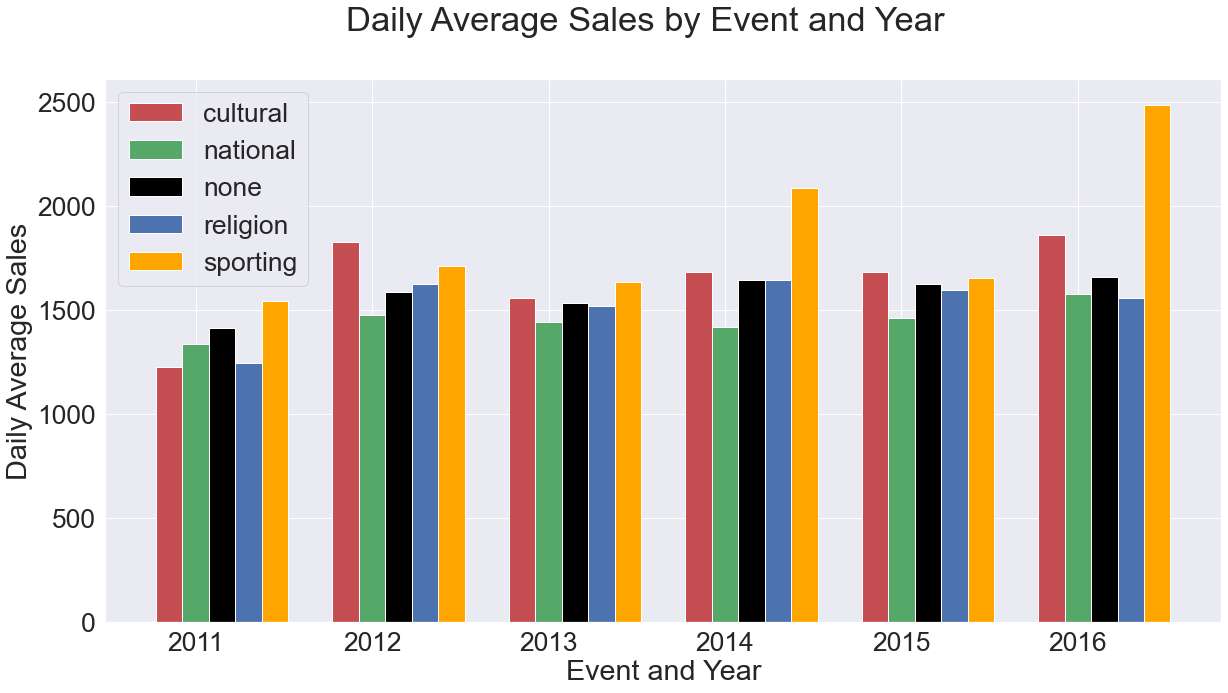

In [927]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(font_scale=2.4)
fig, ax = plt.subplots(figsize = (20, 10))

# Create a bar plot showing the daily average sales for each event and year
X = merged["year"].unique() #[2011,...,2016]
df_events_years = merged.groupby(["event_type_1", "year"])['daily_sales'].mean()

N = 6
ind = np.arange(N) 
width = 0.15

cultural = df_events_years["Cultural"]
national = df_events_years["National"]
none = df_events_years["None"]
religion = df_events_years["Religious"]
sporting = df_events_years["Sporting"]


X_axis = np.arange(len(X))


#df_events_years.plot.bar(subplots=True)


plt.bar(ind, cultural, width, label = 'cultural', color = 'r')
plt.bar(ind+width, national, width, label = 'national', color = 'g')
plt.bar(ind+width*2, none, width, label = 'none', color = 'black')
plt.bar(ind+width*3, religion, width, label = 'religion', color = 'b')
plt.bar(ind+width*4, sporting, width, label = 'sporting', color = 'orange')


plt.xticks(ind+width,X)


# Add a title and labels to the plots
plt.suptitle('Daily Average Sales by Event and Year')
plt.xlabel('Event and Year')
plt.ylabel('Daily Average Sales')
plt.legend()

# Show the plots
plt.show()

we can see that sporting events do have a significant impact on sales

Let's see if there is an impact also one day before the event takes place

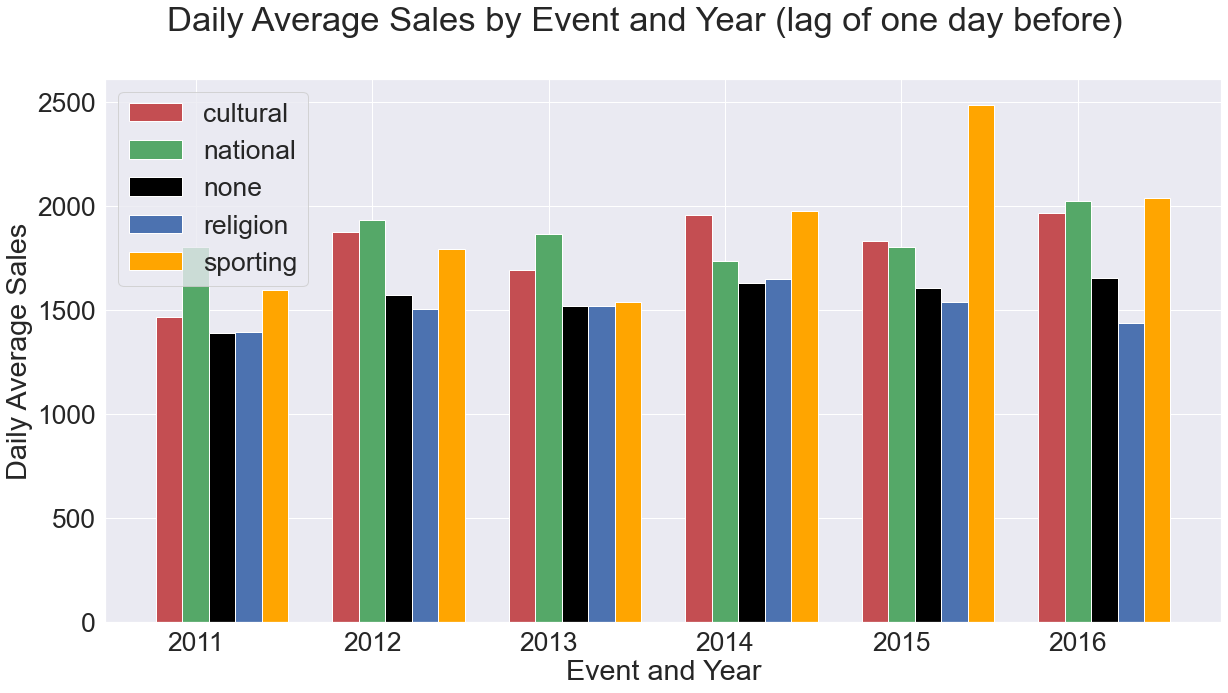

In [928]:
import matplotlib.pyplot as plt
sns.set_theme(font_scale=2.4)

fig, ax = plt.subplots(figsize = (20, 10))

# Create a bar plot showing the daily average sales for each event and year
X = merged["year"].unique() #[2011,...,2016]
df_events_years = merged.groupby(["event_type_1_lag", "year"])['daily_sales'].mean() #this time lagged

N = 6
ind = np.arange(N) 
width = 0.15

cultural = df_events_years["Cultural"]
national = df_events_years["National"]
none = df_events_years["None"]
religion = df_events_years["Religious"]
sporting = df_events_years["Sporting"]


X_axis = np.arange(len(X))


#df_events_years.plot.bar(subplots=True)


plt.bar(ind, cultural, width, label = 'cultural', color = 'r')
plt.bar(ind+width, national, width, label = 'national', color = 'g')
plt.bar(ind+width*2, none, width, label = 'none', color = 'black')
plt.bar(ind+width*3, religion, width, label = 'religion', color = 'b')
plt.bar(ind+width*4, sporting, width, label = 'sporting', color = 'orange')


plt.xticks(ind+width,X)


# Add a title and labels to the plots
plt.suptitle('Daily Average Sales by Event and Year (lag of one day before)')
plt.xlabel('Event and Year')
plt.ylabel('Daily Average Sales')
plt.legend()

# Show the plots
plt.show()

Indeed there is a difference also the day before the event takes place

Trying out more shifts to see if previous results are relevant. If we don't find pattern for lag=2 and lag=3 then indeed previous results will be relevant

In [611]:
merged["event_type_1_lag2"] = merged["event_type_1"].shift(-2)
merged["event_type_1_lag2"] = merged["event_type_1_lag2"].fillna("None")

merged["event_type_1_lag3"] = merged["event_type_1"].shift(-3)
merged["event_type_1_lag3"] = merged["event_type_1_lag3"].fillna("None")

merged.head()

,date,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,...,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,daily_sales,event_type_1_lag,event_type_1_lag2,event_type_1_lag3
0,01-29-2011,0,0,0,0,0,0,27,0,0,...,2011,NaN,None,NaN,NaN,0,1686.0,None,None,None
1,01-30-2011,2,0,0,0,1,0,27,0,0,...,2011,NaN,None,NaN,NaN,0,1661.0,None,None,None
2,01-31-2011,1,0,0,0,1,0,8,0,0,...,2011,NaN,None,NaN,NaN,0,1189.0,None,None,None
3,02-01-2011,3,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,1,1137.0,None,None,None
4,02-02-2011,0,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,0,954.0,None,None,None


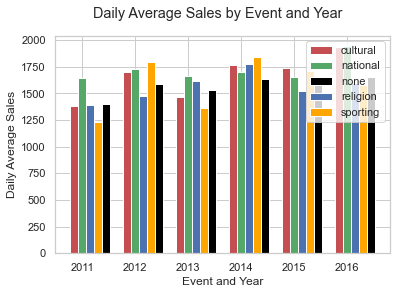

In [907]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Create a bar plot showing the daily average sales for each event and year
X = merged["year"].unique() #[2011,...,2016]
df_events_years = merged.groupby(["event_type_1_lag2", "year"])['daily_sales'].mean()

N = 6
ind = np.arange(N) 
width = 0.15

cultural = df_events_years["Cultural"]
national = df_events_years["National"]
none = df_events_years["None"]
religion = df_events_years["Religious"]
sporting = df_events_years["Sporting"]


X_axis = np.arange(len(X))


#df_events_years.plot.bar(subplots=True)


plt.bar(ind, cultural, width, label = 'cultural', color = 'r')
plt.bar(ind+width, national, width, label = 'national', color = 'g')
plt.bar(ind+width*4, none, width, label = 'none', color = 'black')
plt.bar(ind+width*2, religion, width, label = 'religion', color = 'b')
plt.bar(ind+width*3, sporting, width, label = 'sporting', color = 'orange')


plt.xticks(ind+width,X)


# Add a title and labels to the plots
plt.suptitle('Daily Average Sales by Event and Year')
plt.xlabel('Event and Year')
plt.ylabel('Daily Average Sales')
plt.legend()

# Show the plots
plt.show()

No impact for lag=2 and lag=3. In previous code showed only for lag=2 for simplicity, but same results also for lag=3

Now let's see the frequency of events

In [566]:
count_events_years = merged.groupby(["event_type_1", "year"])['event_type_1'].count()
count_events_years

event_type_1  year
Cultural      2011      6
              2012      7
              2013      6
              2014      6
              2015      7
              2016      3
National      2011      8
              2012     10
              2013     10
              2014     10
              2015     10
              2016      3
None          2011    311
              2012    336
              2013    336
              2014    337
              2015    335
              2016    104
Religious     2011      9
              2012     10
              2013     10
              2014      9
              2015     10
              2016      4
Sporting      2011      3
              2012      3
              2013      3
              2014      3
              2015      3
              2016      1
Name: event_type_1, dtype: int64

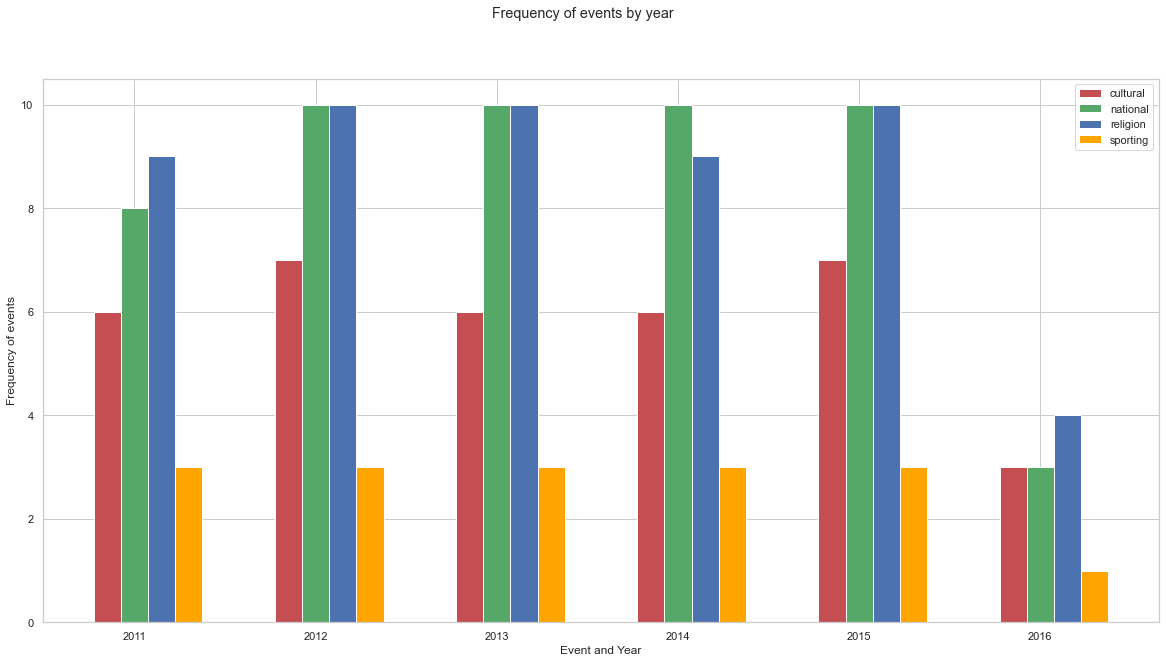

In [567]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 10))

# Create a bar plot showing the daily average sales for each event and year
X = merged["year"].unique() #[2011,...,2016]
count_events_years = merged.groupby(["event_type_1", "year"])['event_type_1'].count()

N = 6
ind = np.arange(N) 
width = 0.15

cultural = count_events_years["Cultural"]
national = count_events_years["National"]
#none = count_events_years["None"]
religion = count_events_years["Religious"]
sporting = count_events_years["Sporting"]


X_axis = np.arange(len(X))


#df_events_years.plot.bar(subplots=True)


plt.bar(ind, cultural, width, label = 'cultural', color = 'r')
plt.bar(ind+width, national, width, label = 'national', color = 'g')
#plt.bar(ind+width*4, none, width, label = 'none', color = 'black')
plt.bar(ind+width*2, religion, width, label = 'religion', color = 'b')
plt.bar(ind+width*3, sporting, width, label = 'sporting', color = 'orange')


plt.xticks(ind+width,X)


# Add a title and labels to the plots
plt.suptitle('Frequency of events by year')
plt.xlabel('Event and Year')
plt.ylabel('Frequency of events')
plt.legend()

# Show the plots
plt.show()

There are only 3 sporting events every year, and two of them still need to happen (nba finals start and end), and they will happen exactly in the 28 days for which we will need to forecast, so it is important to take that into account in the forecasting part

In [613]:
calendar = pd.read_csv("calendar_afcs2022.csv")

# Convert the "date" column to a datetime series
calendar['date'] = pd.to_datetime(calendar['date'])

# Format the datetime series in the desired format
calendar['date'] = calendar['date'].dt.strftime('%m-%d-%Y')
calendar[-28:][calendar[-28:]['event_name_1'].notna()]

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
1948,05-30-2016,11618,Monday,3,5,2016,MemorialDay,National,NaN,NaN,0
1951,06-02-2016,11618,Thursday,6,6,2016,NBAFinalsStart,Sporting,NaN,NaN,0
1956,06-07-2016,11619,Tuesday,4,6,2016,Ramadan starts,Religious,NaN,NaN,1
1968,06-19-2016,11621,Sunday,2,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0


There are 4 out of the 28 days we will need to forecast that have an event. We already talked about sporting events and NBA Finals so let's focus on Ramadan

Let's see if Ramadan has had an impact on the past sales

In [526]:
merged[merged['event_name_1']=='Ramadan starts']

,date,0,1,2,3,4,5,6,7,8,...,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,daily_sales,event_type_1_lag,event_type_1_lag2,event_type_1_lag3
184,08-01-2011,1,0,0,0,0,0,0,0,0,...,2011,Ramadan starts,Religious,NaN,NaN,1,1605.0,None,None,None
538,07-20-2012,0,0,0,0,0,0,8,0,0,...,2012,Ramadan starts,Religious,NaN,NaN,0,1764.0,None,None,None
892,07-09-2013,0,0,0,0,0,0,10,10,0,...,2013,Ramadan starts,Religious,NaN,NaN,1,1509.0,None,None,None
1247,06-29-2014,0,2,0,0,1,0,0,1,0,...,2014,Ramadan starts,Religious,NaN,NaN,0,1947.0,None,None,None
1601,06-18-2015,0,1,1,0,2,0,10,10,2,...,2015,Ramadan starts,Religious,NaN,NaN,0,1320.0,None,None,Cultural


In [569]:
#sorry for hard coding, LOL
ramadan3lag = merged.iloc[[181,182,183,184,185,186,187,535,536,537,538,539,540,541,889,890,891,892,893,894,895,1244,1245,1246,1247,1248,1249,1250,1598,1599,1600,1601,1602,1603,1604],:]
ramadan3lag[:7]

,date,0,1,2,3,4,5,6,7,8,...,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,daily_sales,event_type_1_lag,event_type_1_lag2,event_type_1_lag3
181,07-29-2011,1,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,0,1211.0,None,None,Religious
182,07-30-2011,0,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,0,1593.0,None,Religious,None
183,07-31-2011,1,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,0,1892.0,Religious,None,None
184,08-01-2011,1,0,0,0,0,0,0,0,0,...,2011,Ramadan starts,Religious,NaN,NaN,1,1605.0,None,None,None
185,08-02-2011,1,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,0,1413.0,None,None,None
186,08-03-2011,0,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,1,1544.0,None,None,None
187,08-04-2011,0,0,0,0,0,0,0,0,0,...,2011,NaN,None,NaN,NaN,0,1516.0,None,None,None


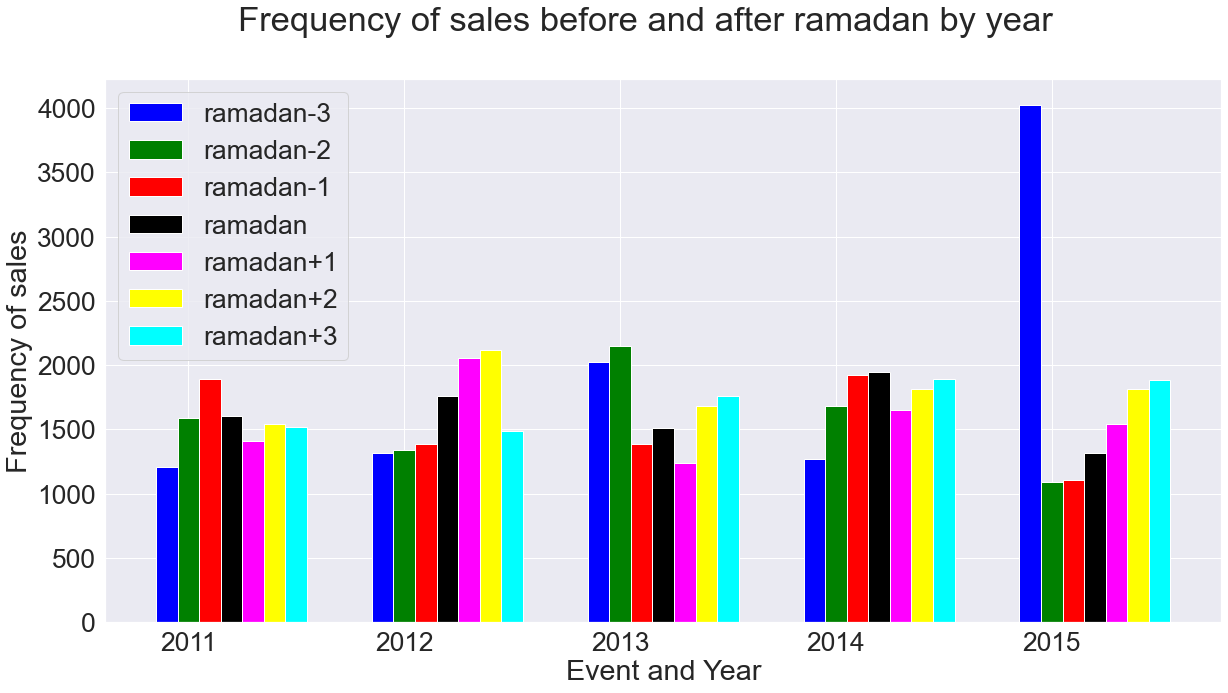

In [931]:
import matplotlib.pyplot as plt
sns.set_theme(font_scale=2.4)

fig, ax = plt.subplots(figsize = (20, 10))

# Create a bar plot showing the daily average sales for each event and year
X = merged["year"].unique()[:-1] #[2011,...,2016]
ramadan3lag = merged.iloc[[181,182,183,184,185,186,187,535,536,537,538,539,540,541,889,890,891,892,893,894,895,1244,1245,1246,1247,1248,1249,1250,1598,1599,1600,1601,1602,1603,1604],:]["daily_sales"]

N = 5
ind = np.arange(N) 
width = 0.1

day_3 = ramadan3lag[::7]
day_2 = ramadan3lag[1::7]
day_1 = ramadan3lag[2::7]
day = ramadan3lag[3::7]
day1 = ramadan3lag[4::7]
day2 = ramadan3lag[5::7]
day3 = ramadan3lag[6::7]

X_axis = np.arange(len(X))

#df_events_years.plot.bar(subplots=True)

plt.bar(ind, day_3, width, label = 'ramadan-3', color = 'blue')
plt.bar(ind+width, day_2, width, label = 'ramadan-2', color = 'green')
plt.bar(ind+width*2, day_1, width, label = 'ramadan-1', color = 'red')
plt.bar(ind+width*3, day, width, label = 'ramadan', color = 'black')
plt.bar(ind+width*4, day1, width, label = 'ramadan+1', color = 'magenta')
plt.bar(ind+width*5, day2, width, label = 'ramadan+2', color = 'yellow')
plt.bar(ind+width*6, day3, width, label = 'ramadan+3', color = 'cyan')


plt.xticks(ind+width,X)


# Add a title and labels to the plots
plt.suptitle('Frequency of sales before and after ramadan by year')
plt.xlabel('Event and Year')
plt.ylabel('Frequency of sales')
plt.legend()

sns.set_palette(['red', 'green', 'blue'])

# Show the plots
plt.show()

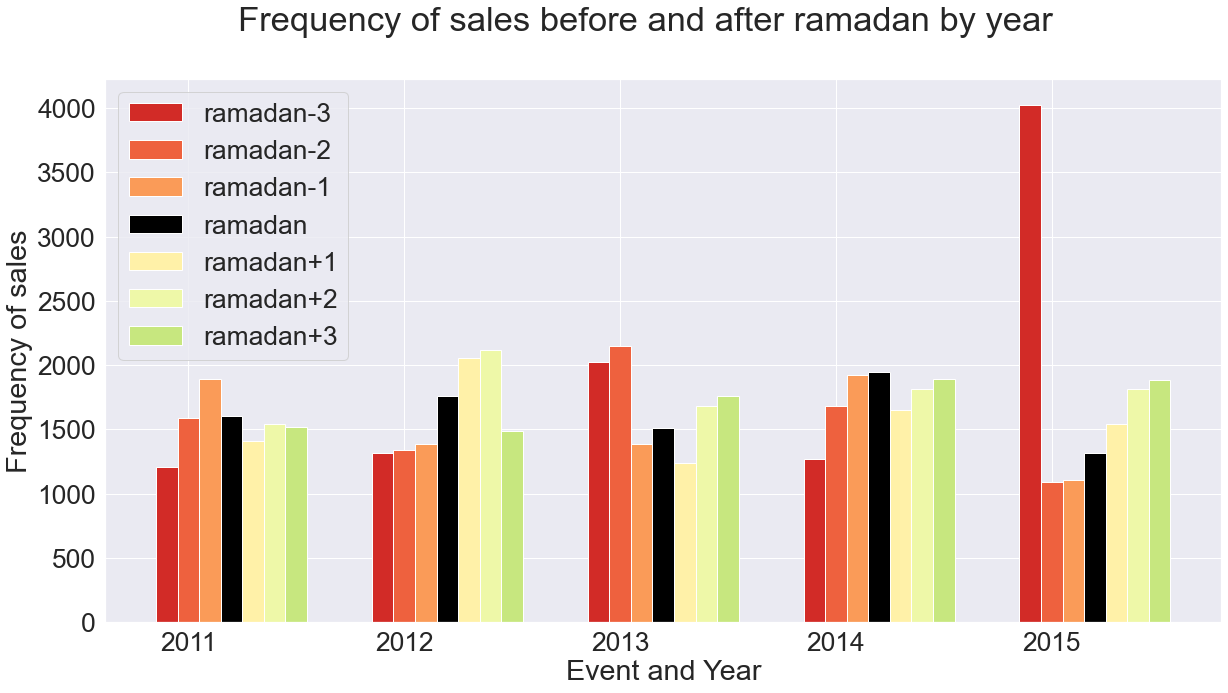

In [939]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font size to be larger
sns.set_theme(font_scale=2.4)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize = (20, 10))

# Create a color palette with 10 shades of blue
palette = sns.color_palette("Blues", 10)
palette = sns.color_palette("RdYlGn", 10)



# Create the data for the bar plot
X = merged["year"].unique()[:-1] #[2011,...,2016]
ramadan3lag = merged.iloc[[181,182,183,184,185,186,187,535,536,537,538,539,540,541,889,890,891,892,893,894,895,1244,1245,1246,1247,1248,1249,1250,1598,1599,1600,1601,1602,1603,1604],:]["daily_sales"]

N = 5
ind = np.arange(N) 
width = 0.1

day_3 = ramadan3lag[::7]
day_2 = ramadan3lag[1::7]
day_1 = ramadan3lag[2::7]
day = ramadan3lag[3::7]
day1 = ramadan3lag[4::7]
day2 = ramadan3lag[5::7]
day3 = ramadan3lag[6::7]

X_axis = np.arange(len(X))

# Plot the bars using the color palette
plt.bar(ind, day_3, width, label = 'ramadan-3', color=palette[0])
plt.bar(ind+width, day_2, width, label = 'ramadan-2', color=palette[1])
plt.bar(ind+width*2, day_1, width, label = 'ramadan-1', color=palette[2])
plt.bar(ind+width*3, day, width, label = 'ramadan', color='black')
plt.bar(ind+width*4, day1, width, label = 'ramadan+1', color=palette[4])
plt.bar(ind+width*5, day2, width, label = 'ramadan+2', color=palette[5])
plt.bar(ind+width*6, day3, width, label = 'ramadan+3', color=palette[6])

# Set the x-axis labels
plt.xticks(ind+width,X)

# Add a title and labels to the plots
plt.suptitle('Frequency of sales before and after ramadan by year')
plt.xlabel('Event and Year')
plt.ylabel('Frequency of sales')
plt.legend()

# Show the plot
plt.show()


Ramadan doesn't seem to have such an impact, we can see that sales after ramadan don't really differ significantly from sales before ramadan

## Investigating on snap

In [568]:
count_snap_years = merged.groupby("year")['snap_TX'].sum()
count_snap_years

year
2011    110
2012    120
2013    120
2014    120
2015    120
2016     40
Name: snap_TX, dtype: int64

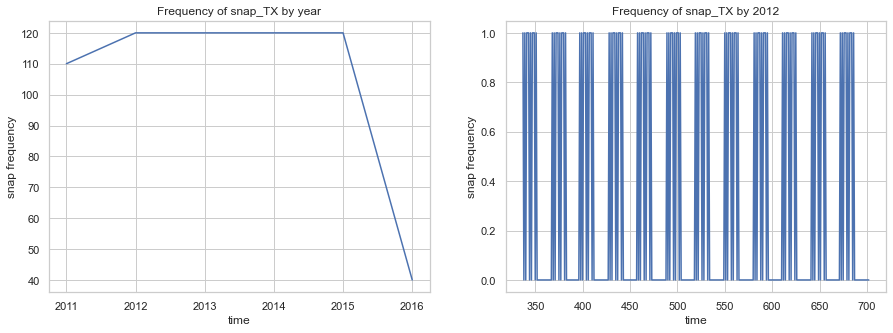

In [685]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

count_snap_years = merged.groupby("year")['snap_TX'].sum()

plt.title('Frequency of snap_TX by year')
plt.ylabel('snap frequency')
plt.xlabel('time')
plt.plot(count_snap_years)

plt.subplot(1, 2, 2)

count_snap_years = merged[merged['year'] == 2012]['snap_TX']


plt.title('Frequency of snap_TX by 2012')
plt.ylabel('snap frequency')
plt.xlabel('time')
plt.plot(count_snap_years)


plt.show()

snap frequency is constant throughout the years (note that 2011 starts from the 29th of january so that's why in 2011 there are 110 days instead of 120, and we have only partial data for 2016). Moreover, days with snap don't happen randomly, there is a trend, however, it will not be relevant in our analysis since we already have the snap data for the days we need to forecast.

snap_TX
0    1501.938426
1    1699.157143
Name: daily_sales, dtype: float64


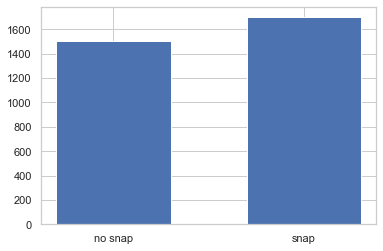

In [688]:
plt.figure(figsize=(6, 4))
bar = merged.groupby('snap_TX')['daily_sales'].mean()
plt.bar(bar.index, bar.values, width=0.6)
plt.xticks(bar.index, ["no snap", "snap"])
print(bar)
plt.show()

sales are higher when there is snap. It will be interesting to take this into account later in the forecasting part

snap_TX
0    1501.938426
1    1699.157143
Name: daily_sales, dtype: float64


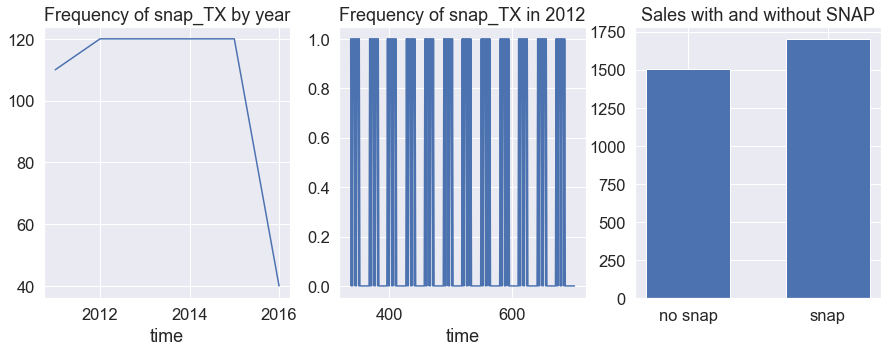

In [943]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.set_theme(font_scale=1.5)


count_snap_years = merged.groupby("year")['snap_TX'].sum()

plt.title('Frequency of snap_TX by year')
#plt.ylabel('snap frequency')
plt.xlabel('time')
plt.plot(count_snap_years)

plt.subplot(1, 3, 2)

count_snap_years = merged[merged['year'] == 2012]['snap_TX']


plt.title('Frequency of snap_TX in 2012')
#plt.ylabel('snap frequency')
plt.xlabel('time')
plt.plot(count_snap_years)

plt.subplot(1, 3, 3)

bar = merged.groupby('snap_TX')['daily_sales'].mean()
plt.bar(bar.index, bar.values, width=0.6)
plt.title('Sales with and without SNAP')
#plt.ylabel('sales')
plt.xticks(bar.index, ["no snap", "snap"])
print(bar)
plt.show()